In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

missing_values


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
# Calculate basic statistics
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_sales = df['Total Amount'].std()

mean_sales, median_sales, mode_sales, std_sales


(456.0, 135.0, 50, 559.997631555123)

In [6]:
# Aggregate sales by month
df.set_index('Date', inplace=True)
monthly_sales = df.resample('M')['Total Amount'].sum()

monthly_sales


Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64

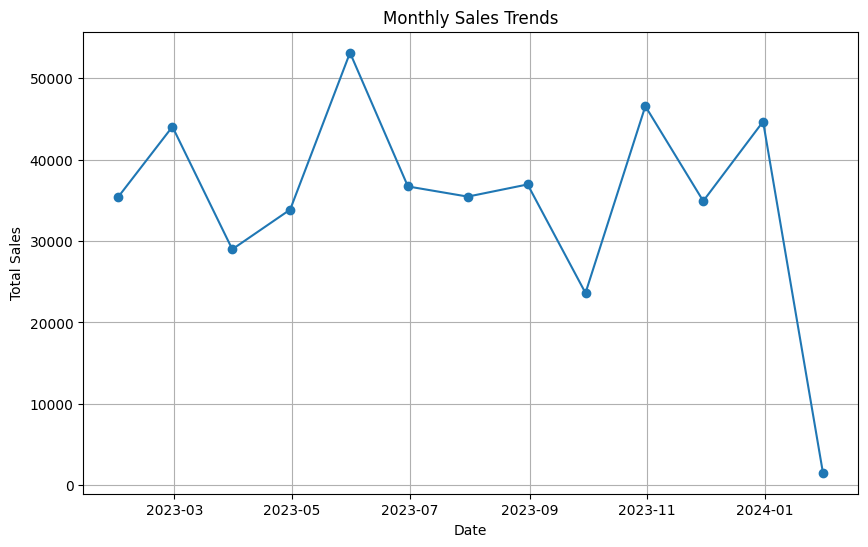

In [7]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [8]:
# Customer demographics
customer_demographics = df[['Customer ID', 'Gender', 'Age']].drop_duplicates()
gender_distribution = customer_demographics['Gender'].value_counts()
age_distribution = customer_demographics['Age'].describe()

gender_distribution, age_distribution


(Gender
 Female    510
 Male      490
 Name: count, dtype: int64,
 count    1000.00000
 mean       41.39200
 std        13.68143
 min        18.00000
 25%        29.00000
 50%        42.00000
 75%        53.00000
 max        64.00000
 Name: Age, dtype: float64)

In [9]:
# Top-selling products
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

top_products


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

In [21]:

df = df.reset_index()

# Re-run RFM analysis
current_date = df['Date'].max()
rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Transaction ID': 'count',
    'Total Amount': 'sum'
}).reset_index()
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

Customer ID  Recency  Frequency  Monetary
0     CUST001       38          1       150
1     CUST002      308          1      1000
2     CUST003      353          1        30
3     CUST004      225          1       500
4     CUST005      240          1       100

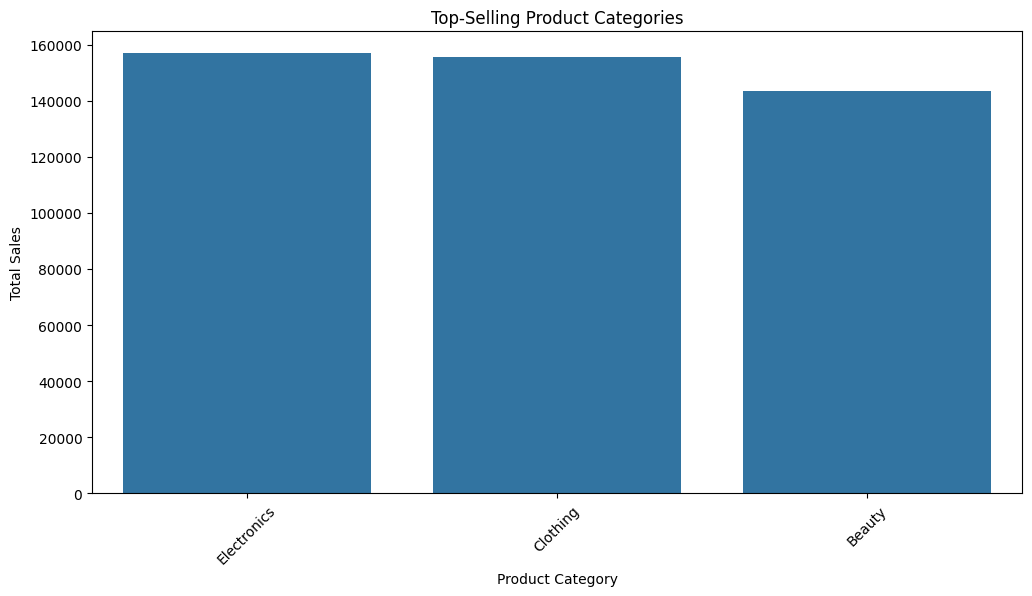

In [22]:
import seaborn as sns

# Bar chart for top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top-Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



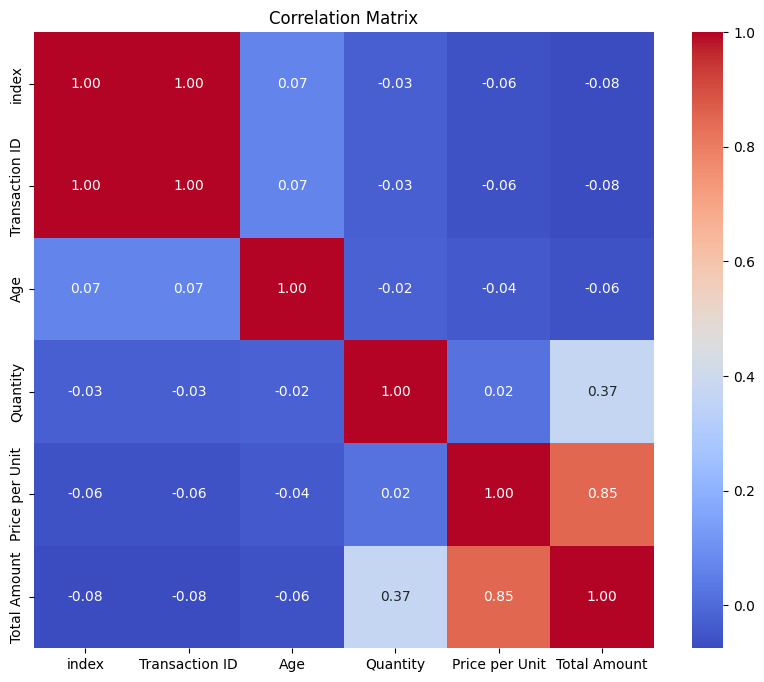

In [24]:
# Heatmap for correlations
corr_matrix = df.select_dtypes(include=['number']).corr() # Only include numeric columns in the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()